In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
wine = pd.read_csv('../data/winequality-red.csv')

In [5]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [9]:
import seaborn as sns

Text(0.5,1,'Correlation between variables')

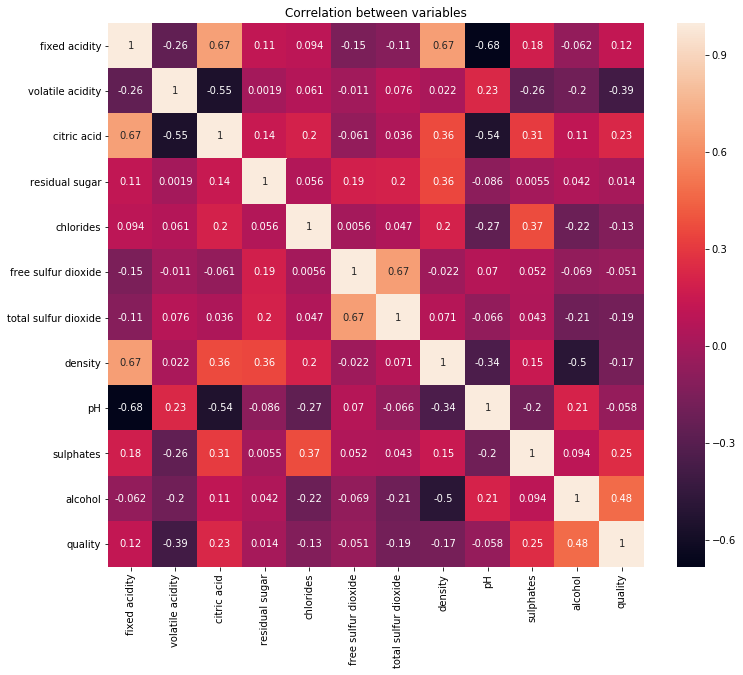

In [14]:
corr = wine.corr()
fig, ax = plt.subplots(figsize = (12,10))
g = sns.heatmap(corr, ax=ax, annot=True)
ax.set_title('Correlation between variables')

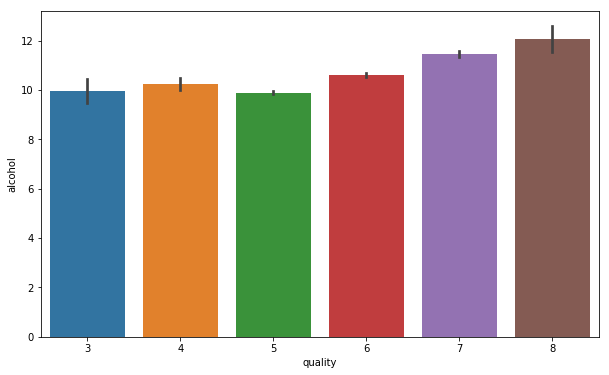

In [15]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x='quality', y='alcohol', data=wine)

In [17]:
y = wine.quality
X = wine.drop('quality', axis=1)

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
train_x, test_x, train_y, test_y = train_test_split(X,y,random_state=0, stratify=y)

In [51]:
from sklearn import preprocessing

In [68]:
scaler = preprocessing.StandardScaler().fit(train_x)
train_x_scaled = scaler.transform(train_x)
test_x_scaled = scaler.transform(test_x)

In [72]:
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error

In [76]:
models = []
models.append(('DecisionTree', DecisionTreeRegressor()))
models.append(('RandomForest', RandomForestRegressor()))
models.append(('GradientBoost', GradientBoostingRegressor()))
models.append(('SVR', SVR()))
names = []

In [77]:
for name, model in models:
    kfold = model_selection.KFold(n_splits=5, random_state=2)
    cv_results = model_selection.cross_val_score(model, train_x_scaled, train_y, cv=kfold, scoring = 'neg_mean_absolute_error')
    names.append(name)
    msg = "{}: {}".format(name, -1*(cv_results).mean())
    print(msg)

DecisionTree: 0.5021059972105998
RandomForest: 0.46169630404463036
GradientBoost: 0.5020445894028149
SVR: 0.4773092187008322


In [78]:
model = RandomForestRegressor()
model.fit(train_x_scaled, train_y)
pred_y = model.predict(test_x_scaled)

In [80]:
mean_absolute_error(pred_y, test_y)

0.41224999999999995

In [94]:
test_y.head()

499     6
683     5
840     7
1335    6
1148    6
Name: quality, dtype: int64

In [97]:
pred_y

array([6.1, 5.2, 6.2, 6.5, 6.5, 6. , 6.4, 6.8, 5.8, 5.3, 5. , 5. , 4.8,
       5.1, 5.7, 5.8, 5.3, 5.4, 5. , 5.1, 5.2, 5.3, 6.5, 5.3, 5.5, 4.6,
       4.8, 6.8, 5.6, 6.4, 5.1, 4.9, 6.9, 5. , 5.2, 6. , 6.2, 5.2, 6.8,
       5.6, 5.9, 5.7, 5.8, 5.5, 5.9, 5.2, 5.2, 5.2, 5.7, 6. , 5.5, 5.6,
       4.9, 6.8, 5.8, 5.9, 5.1, 5.1, 5.2, 5.4, 5.8, 5. , 5.2, 5.3, 4.9,
       6. , 5.8, 5.7, 5.5, 6.5, 7. , 6.6, 6.5, 5.3, 4.9, 5.3, 5.1, 5.2,
       5.1, 6.3, 5.8, 5.2, 6.5, 5.5, 6.9, 4.8, 6.1, 5.7, 5.1, 5.8, 6. ,
       5.3, 6.1, 6.1, 6.2, 4.9, 5.5, 4.9, 6.2, 5.1, 5.8, 5.8, 4.9, 7.2,
       5. , 6.4, 4.8, 5. , 5.2, 5.5, 6.3, 5.3, 6.3, 5. , 6.1, 5.2, 5.6,
       5.5, 5.8, 5.8, 6.2, 5.7, 6.1, 5.4, 5.9, 5.6, 6.6, 4.9, 5.1, 5.5,
       6. , 5.9, 5.1, 5.2, 6.7, 6.1, 4.8, 5.1, 5.1, 5. , 6.2, 5.1, 6. ,
       5.9, 5.7, 5.6, 5.8, 5. , 6.2, 5.5, 5.5, 5.7, 5.9, 6.1, 6.3, 5.9,
       5.2, 5.4, 5. , 6.2, 5.8, 5.3, 5.9, 5.1, 6.4, 6.1, 6.3, 5.8, 6. ,
       5.5, 5.1, 5. , 5.4, 6.2, 6.5, 5.2, 6.5, 5.8, 5.1, 4.8, 6.

In [98]:
RandomForestRegressor?

Init signature: RandomForestRegressor(n_estimators=10, criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False)
Docstring:     
A random forest regressor.

A random forest is a meta estimator that fits a number of classifying
decision trees on various sub-samples of the dataset and use averaging
to improve the predictive accuracy and control over-fitting.
The sub-sample size is always the same as the original
input sample size but the samples are drawn with replacement if
`bootstrap=True` (default).

Read more in the :ref:`User Guide <forest>`.

Parameters
----------
n_estimators : integer, optional (default=10)
    The number of trees in the forest.

criterion : string, optional (default="mse")
    The function to measure the quality of a split. Supported c

In [102]:
def get_mae_rf(num_est, predictors_train, predictors_val, targ_train, targ_val):
    model = RandomForestRegressor(n_estimators=num_est, random_state=0)
    model.fit(predictors_train, targ_train)
    preds_val = model.predict(predictors_val)
    mae = mean_absolute_error(targ_val, preds_val)
    
    return(mae)

In [103]:
plot_mae = {}
for num_est in range(2,50):
    my_mae = get_mae_rf(num_est, train_x_scaled, test_x_scaled, train_y, test_y)
    plot_mae[num_est] = my_mae

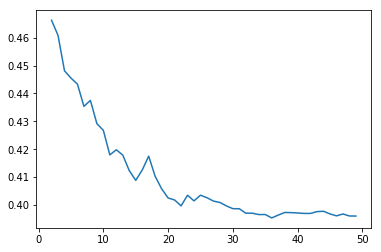

In [119]:
plt.plot(plot_mae.keys(), plot_mae.values())
plt.show()

In [129]:
model = RandomForestRegressor(n_estimators=36)
model.fit(train_x_scaled,train_y)
pred_y = model.predict(test_x_scaled)

In [130]:
mean_absolute_error(pred_y, test_y)

0.39805555555555555